Decision Tree = Supervised machine learning model yang digunakan untuk predict melalui berbagai pilihan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #warning untuk menghilangkan warning
from sklearn.model_selection import train_test_split

### Overview

In [2]:
df_adm = pd.read_csv('Admission_Predict.csv').drop(['Serial No.'], axis = 1)

In [3]:
df_adm.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace=True)

In [4]:
df_adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df_adm.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Visualize Features

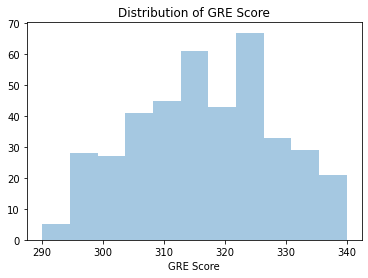

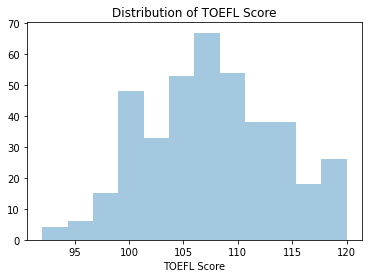

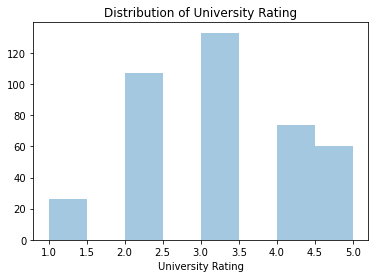

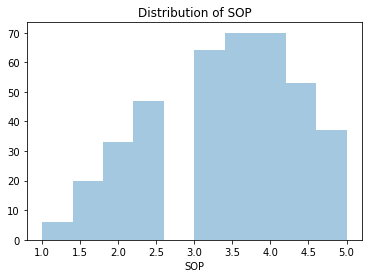

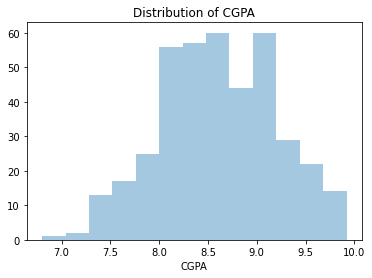

In [6]:
for data in df_adm[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA']]:
    sns.distplot(df_adm[data], kde = False)
    plt.title(f'Distribution of {str(data)}')
    plt.show()

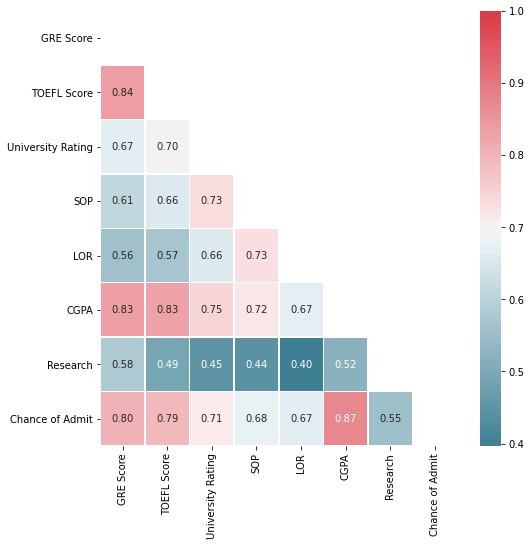

In [7]:
corr = df_adm.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor, LogisticRegression, SGDRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
#Split Dep(y) & Indep(x)
x = df_adm.drop(['Chance of Admit'], axis=1)
y = df_adm['Chance of Admit']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, shuffle=False)

In [14]:
method = [['Linear :', LinearRegression()], 
          ['Elastic :', ElasticNet()], 
          ['Lasso :', Lasso()],
          ['Ridge :', Ridge()], 
          ['Decision Tree :', DecisionTreeRegressor()], 
          ['Random Forest :', RandomForestRegressor()],
          ['KNeighbors :', KNeighborsRegressor(n_neighbors = 2)], 
          ['SVM :', SVR()], 
          ['Ada Boost :', AdaBoostRegressor()], 
          ['Gradient Boost :', GradientBoostingRegressor()], 
          ['Beyesian Ridge :', BayesianRidge()]]

In [15]:
for name, models in method :
    model = models
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print('RMSE', name, (np.sqrt(mean_squared_error(y_test, predictions))))

RMSE Linear : 0.06473311695782089
RMSE Elastic : 0.09805987388222617
RMSE Lasso : 0.1313765707596043
RMSE Ridge : 0.06479970981992432
RMSE Decision Tree : 0.09239859306288165
RMSE Random Forest : 0.07044310470159586
RMSE KNeighbors : 0.083342291185208
RMSE SVM : 0.08180727044650482
RMSE Ada Boost : 0.08251263083544526
RMSE Gradient Boost : 0.06660824869388983
RMSE Beyesian Ridge : 0.06489639576721208


### Feature Importance

In [16]:
classifier = RandomForestRegressor()
classifier.fit(x,y)
feature_names = x.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = x.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

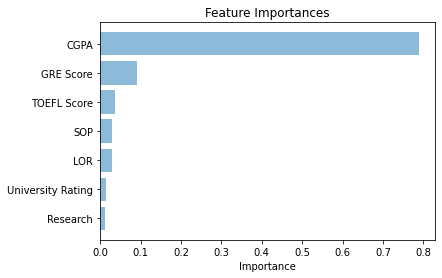

In [17]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()